# Test NeuralNet class

In [1]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load the dataset

### Separate data without normalization

In [2]:
# Load the file and converted into de dataframe
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

# Separate the input and output columns
y = df['SalePrice'].values
X = df.drop('SalePrice', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#store the min and the max of each column to denormalize the data later
min_max = {}
for column in df.columns:
    min_max[column] = [df[column].abs().min(), df[column].abs().max()]

# normalize all the data of the dataframe between 0 and 1
df_scaled = df.copy()

#normalize the data between 0 and 1 using the min_max dictionary
for column in df_scaled.columns:
    df_scaled[column] = 0.1 + 0.8 * (df_scaled[column] - min_max[column][0])  / (min_max[column][1] - min_max[column][0])

yn = df_scaled['SalePrice'].values
Xn = df_scaled.drop('SalePrice', axis=1).values

# Split the data into training and testing sets
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

In [23]:
nn = NeuralNet(layers=[Xn_train.shape[1], 64, 32, 1], function='relu')
nn.fit(Xn_train, yn_train)

Epoch 0/1000 - Training Error: 0.013898 - Validation Error: 0.014838
Epoch 100/1000 - Training Error: 0.002781 - Validation Error: 0.004281
Epoch 200/1000 - Training Error: 0.002182 - Validation Error: 0.003602
Epoch 300/1000 - Training Error: 0.001916 - Validation Error: 0.003272
Epoch 400/1000 - Training Error: 0.001796 - Validation Error: 0.003200
Epoch 500/1000 - Training Error: 0.001647 - Validation Error: 0.003190
Epoch 600/1000 - Training Error: 0.001526 - Validation Error: 0.003173
Epoch 700/1000 - Training Error: 0.001441 - Validation Error: 0.003232
Epoch 800/1000 - Training Error: 0.001352 - Validation Error: 0.003265
Epoch 900/1000 - Training Error: 0.001804 - Validation Error: 0.003915


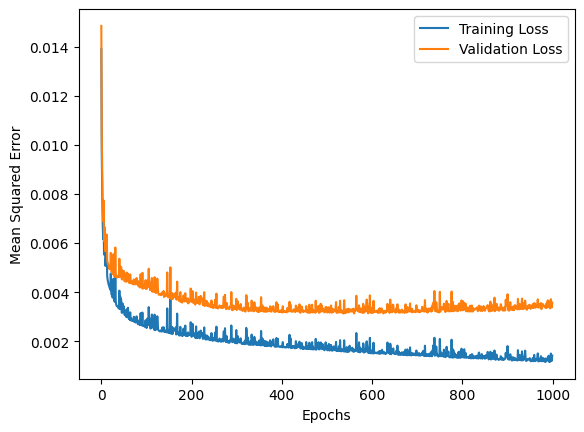

Predictions: [0.52992752 0.50944421 0.42365477 0.23695316 0.46820717 0.50535241
 0.44756862 0.58055407 0.35455924 0.33533399 0.48239694 0.36437289
 0.39221446 0.41759393 0.32867266 0.81791085 0.92185049 0.44309367
 0.53810203 0.51820243 0.34558226 0.63291278 0.39923599 0.56038091
 0.42564845 0.41417261 0.37717057 0.10194522 0.52740821 0.44628138
 0.34140761 0.50059312 0.48929516 0.24524913 0.49068707 0.75564766
 0.27844327 0.42387828 0.6233965  0.23489155 0.42741835 0.31419626
 0.24330821 0.47822029 0.43800436 0.20727246 0.33375416 0.40646025
 0.4526624  0.76830746 0.62577936 0.15256934 0.80014745 0.31690705
 0.33884877 0.32750953 0.23329299 0.5609267  0.36822937 0.58638855
 0.39272814 0.69865409 0.86588604 0.69595699 0.30729629 0.30543468
 0.44545875 0.52380643 0.28566872 0.46795323 0.47118879 0.67241184
 0.30407008 0.27929507 0.56320921 0.20546425 0.50326125 0.1284014
 0.53783843 0.51007919 0.42873404 0.69158623 0.39339572 0.23542638
 0.33978934 0.42204023 0.50089737 0.44351803 0.521

In [24]:
train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
predictions = nn.predict(Xn_test)
print("Predictions:", predictions.flatten())

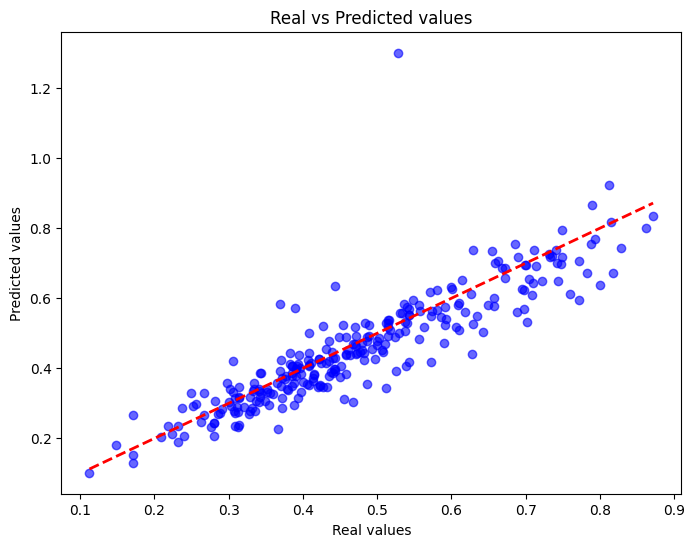

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()

In [27]:
# Denormalization

# predictions
pred_train = nn.predict(Xn_train)
pred_test = nn.predict(Xn_test)

# data denormalization
pred_train = min_max['SalePrice'][0] + (pred_train - 0.1) * (min_max['SalePrice'][1] - min_max['SalePrice'][0]) / 0.8
pred_test = min_max['SalePrice'][0] + (pred_test - 0.1) * (min_max['SalePrice'][1] - min_max['SalePrice'][0]) / 0.8

err_nn_train = 100 * sum(abs(pred_train - y_train)) / sum(y_train)
err_nn_test = 100 * sum(abs(pred_test - y_test)) / sum(y_test)

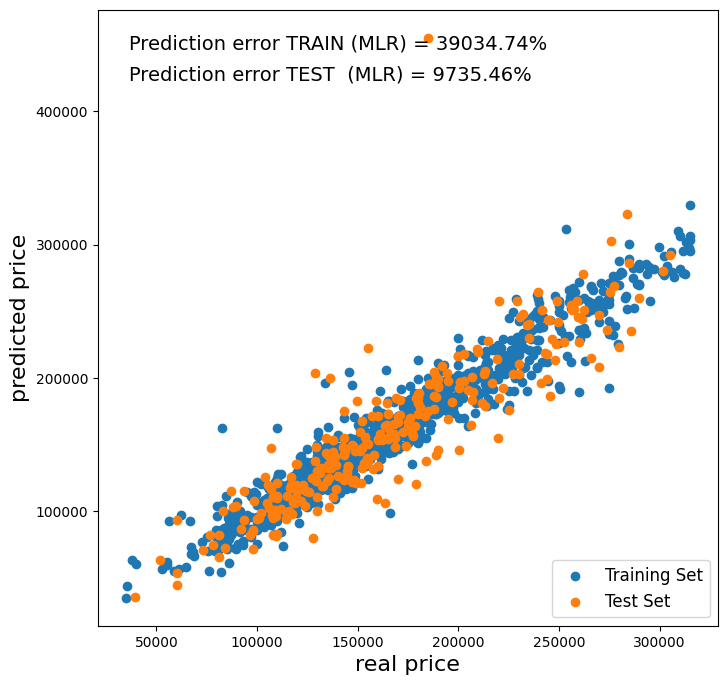

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_train, pred_train, label='Training Set')
ax.scatter(y_test, pred_test, label='Test Set')
ax.set_xlabel("real price", fontsize=16)
ax.set_ylabel("predicted price", fontsize=16)

# label text: fija el nombre correcto (TRAIN / TEST)
ax.text(0.05, 0.90, f"Prediction error TRAIN (MLR) = {err_nn_train_f:.2f}%\n", transform=ax.transAxes, fontsize=14)
ax.text(0.05, 0.85, f"Prediction error TEST  (MLR) = {err_nn_test_f:.2f}%\n",  transform=ax.transAxes, fontsize=14)

ax.legend(loc='lower right', fontsize=12)
plt.show()

### Optional part 2

In [33]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
fold = 1
predictions_kf_2 = []
real_values_kf = []

for train_index, test_index in kf.split(Xn):
    Xn_train_kf, Xn_test_kf = Xn[train_index], Xn[test_index]
    yn_train_kf, yn_test_kf = yn[train_index], yn[test_index]
    
    real_values_kf.append(yn_test_kf)
    nn_kf = NeuralNet(layers=[Xn_train_kf.shape[1], 64, 32, 1], function='tanh')
    nn_kf.fit(Xn_train_kf, yn_train_kf)
    predictions_kf = nn_kf.predict(Xn_test_kf)
    predictions_kf_2.append(predictions_kf)
    
    fold += 1

Epoch 0/1000 - Training Error: 0.015143 - Validation Error: 0.018513
Epoch 100/1000 - Training Error: 0.002682 - Validation Error: 0.005062
Epoch 200/1000 - Training Error: 0.002391 - Validation Error: 0.004775
Epoch 300/1000 - Training Error: 0.002176 - Validation Error: 0.004683
Epoch 400/1000 - Training Error: 0.002121 - Validation Error: 0.004681
Epoch 500/1000 - Training Error: 0.001989 - Validation Error: 0.004665
Epoch 600/1000 - Training Error: 0.001949 - Validation Error: 0.004713
Epoch 700/1000 - Training Error: 0.001928 - Validation Error: 0.004747
Epoch 800/1000 - Training Error: 0.001971 - Validation Error: 0.004855
Epoch 900/1000 - Training Error: 0.001770 - Validation Error: 0.004726
Epoch 0/1000 - Training Error: 0.012877 - Validation Error: 0.016379
Epoch 100/1000 - Training Error: 0.003336 - Validation Error: 0.005487
Epoch 200/1000 - Training Error: 0.003112 - Validation Error: 0.005325
Epoch 300/1000 - Training Error: 0.003112 - Validation Error: 0.005354
Epoch 400/

In [ ]:
for i in range(len(predictions_kf_2)):

    y_true = real_values_kf[i]
    y_pred = predictions_kf_2[i]
    
    mse_result = mean_squared_error(y_true, y_pred)
    print(f"MSE: {mse_result:.4f}")

    mae_result = mean_absolute_error(y_true, y_pred)
    print(f"MAE: {mae_result:.4f}")

    def calculate_mape(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        # Filter out near-zero y_true values to prevent division by zero
        non_zero_indices = y_true != 0 
        return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

    mape_result = calculate_mape(y_true, y_pred)
    print(f"MAPE: {mape_result:.4f}%")

    

MSE: 0.0040
MAE: 0.0452
MAPE: 40.2075%
MSE: 0.0034
MAE: 0.0421
MAPE: 40.0681%
MSE: 0.0031
MAE: 0.0408
MAPE: 44.7627%
MSE: 0.0040
MAE: 0.0439
MAPE: 38.9785%
MSE: 0.0033
MAE: 0.0410
MAPE: 38.7184%


In [ ]:
from itertools import product

results = []   # store summary for each hyperparameter combination
all_predictions = {}  # optional: keep predictions per combo if you want to inspect later
grid_parameters = {
    'epochs': [300, 200],
    'learning_rate': [0.01, 0.001],
    'function': ['relu', 'tanh'],
}

for epochs, lr, func in product(grid_parameters['epochs'],
                                grid_parameters['learning_rate'],
                                grid_parameters['function']):
    fold_mse = []
    fold_mae = []
    fold = 1
    print(f"Evaluating combination: epochs={epochs}, lr={lr}, func={func}")

    # run your existing CV for this hyperparameter combo
    for train_index, test_index in kf.split(Xn):
        Xn_train_kf, Xn_test_kf = Xn[train_index], Xn[test_index]
        yn_train_kf, yn_test_kf = yn[train_index], yn[test_index]

        # instantiate NN with the hyperparams for this grid point
        nn_kf = NeuralNet(
            layers=[Xn_train_kf.shape[1], 64, 32, 1],
            epochs=epochs,
            learning_rate=lr,
            function=func
        )

        nn_kf.fit(Xn_train_kf, yn_train_kf)
        preds = nn_kf.predict(Xn_test_kf)

        # ensure shapes align: flatten if needed
        preds = np.asarray(preds).reshape(-1)
        yn_test_kf = np.asarray(yn_test_kf).reshape(-1)

        fold_mse.append(mean_squared_error(preds, yn_test_kf))
        fold_mae.append(mean_absolute_error(preds, yn_test_kf))

        fold += 1

    fold_mse_value = np.mean(fold_mse)
    fold_mae_value = np.mean(fold_mae)

    # store results
    combo_key = f"epochs={epochs}_lr={lr}_func={func}"
    results.append({
        'combo': combo_key,
        'epochs': epochs,
        'learning_rate': lr,
        'function': func,
        'mse': fold_mse_value,
        'mae': fold_mae_value,
    })



Evaluating combination: epochs=300, lr=0.01, func=relu
Epoch 0/300 - Training Error: 0.006703 - Validation Error: 0.009534
Epoch 100/300 - Training Error: 0.002097 - Validation Error: 0.012480
Epoch 200/300 - Training Error: 0.001457 - Validation Error: 0.013624
Epoch 0/300 - Training Error: 0.245538 - Validation Error: 0.264123
Epoch 100/300 - Training Error: 0.245538 - Validation Error: 0.264123
Epoch 200/300 - Training Error: 0.245538 - Validation Error: 0.264123
Epoch 0/300 - Training Error: 0.246353 - Validation Error: 0.251742
Epoch 100/300 - Training Error: 0.246353 - Validation Error: 0.251742
Epoch 200/300 - Training Error: 0.246353 - Validation Error: 0.251742
Epoch 0/300 - Training Error: 0.252806 - Validation Error: 0.254595
Epoch 100/300 - Training Error: 0.252806 - Validation Error: 0.254595
Epoch 200/300 - Training Error: 0.252806 - Validation Error: 0.254595
Epoch 0/300 - Training Error: 0.250154 - Validation Error: 0.263749
Epoch 100/300 - Training Error: 0.250154 - Va

In [ ]:
results_sorted = sorted(results, key=lambda x: x['mse'])
for r in results_sorted:
    print(f"{r['combo']}: MSE={r['mse']:.4f}, MAE={r['mae']:.4f}")

epochs=200_lr=0.01_func=tanh: MSE=0.0034, MAE=0.0409, n=1093
epochs=300_lr=0.01_func=tanh: MSE=0.0038, MAE=0.0429, n=1093
epochs=300_lr=0.001_func=tanh: MSE=0.0039, MAE=0.0452, n=1093
epochs=200_lr=0.001_func=tanh: MSE=0.0039, MAE=0.0453, n=1093
epochs=300_lr=0.001_func=relu: MSE=0.0519, MAE=0.1300, n=1093
epochs=200_lr=0.001_func=relu: MSE=0.1560, MAE=0.3077, n=1093
epochs=300_lr=0.01_func=relu: MSE=0.2021, MAE=0.3905, n=1093
epochs=200_lr=0.01_func=relu: MSE=0.2035, MAE=0.3938, n=1093


### Optional part 3

#### XGBoost

In [15]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(Xn_train, yn_train)
xgb_predictions = xgb_model.predict(Xn_test)

mse_xgb = mean_squared_error(yn_test, xgb_predictions)
r2_score_xgb = r2_score(yn_test, xgb_predictions)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R2 Score: {r2_score_xgb:.4f}")

XGBoost MSE: 0.0039
XGBoost R2 Score: 0.8373


Text(0.5, 1.0, 'XGBoost: Real vs Predicted values before Grid Search')

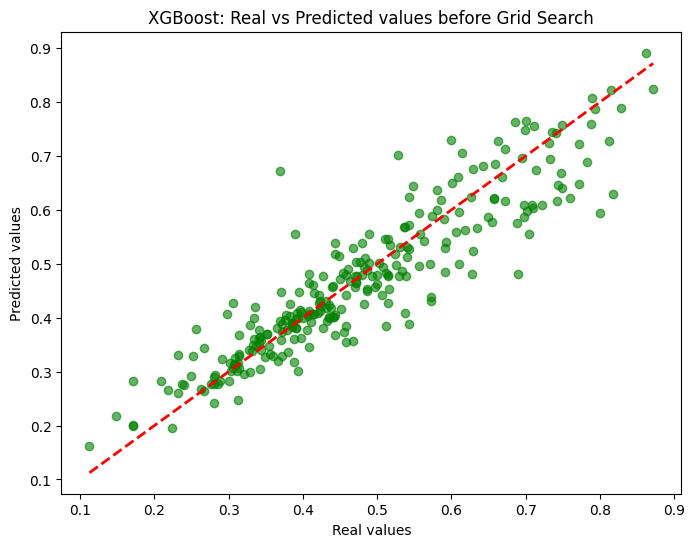

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, xgb_predictions, alpha=0.6, color='green')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('XGBoost: Real vs Predicted values before Grid Search')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid=param_grid)
grid_search.fit(Xn_train, yn_train)

grid_search.best_params_
best_xgb_model = grid_search.best_estimator_
print("Best XGBoost Parameters:", grid_search.best_params_)

best_xgb_predictions = best_xgb_model.predict(Xn_test)

best_mse_xgb = mean_squared_error(yn_test, best_xgb_predictions)
best_r2_score_xgb = r2_score(yn_test, best_xgb_predictions)

print(f"Best XGBoost MSE after Grid Search: {best_mse_xgb:.4f}")
print(f"Best XGBoost R2 Score after Grid Search: {best_r2_score_xgb:.4f}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost RMSE after Grid Search: 0.0031
Best XGBoost R2 Score after Grid Search: 0.8724


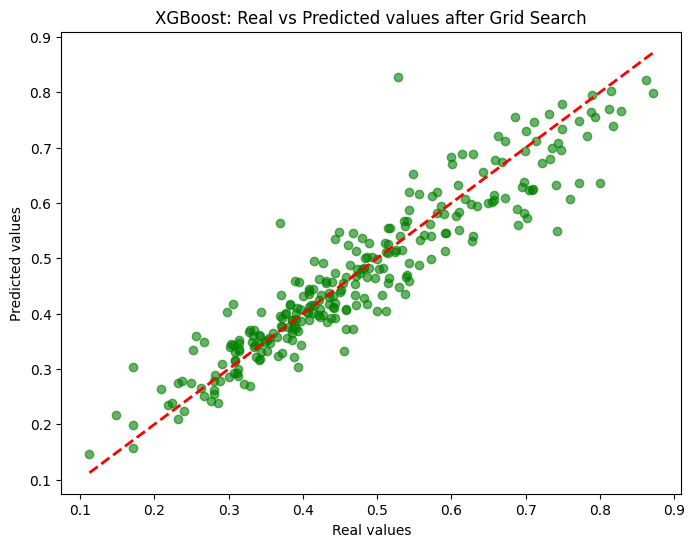

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, best_xgb_predictions, alpha=0.6, color='green')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('XGBoost: Real vs Predicted values after Grid Search')
plt.show()

#### Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(Xn_train, yn_train)
rf_predictions = rf_model.predict(Xn_test)

mse_rf = mean_squared_error(yn_test, rf_predictions)
r2_score_rf = r2_score(yn_test, rf_predictions)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R2 Score: {r2_score_rf:.4f}")

Random Forest MSE: 0.0037
Random Forest R2 Score: 0.8460


Text(0.5, 1.0, 'Random Forest: Real vs Predicted values before Grid Search')

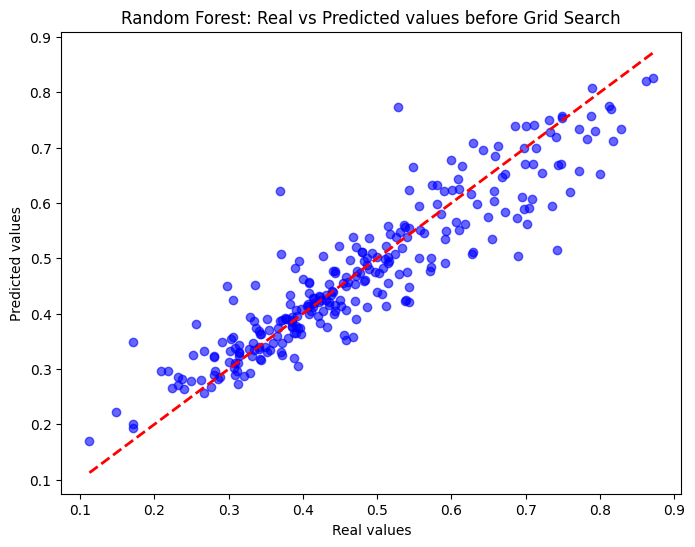

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Random Forest: Real vs Predicted values before Grid Search')

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid)
grid_search_rf.fit(Xn_train, yn_train)

grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

best_rf_predictions = best_rf_model.predict(Xn_test)
best_mse_rf = mean_squared_error(yn_test, best_rf_predictions)
best_r2_score_rf = r2_score(yn_test, best_rf_predictions)

print(f"Best Random Forest MSE after Grid Search: {best_mse_rf:.4f}")
print(f"Best Random Forest R2 Score after Grid Search: {best_r2_score_rf:.4f}")

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest MSE after Grid Search: 0.0037
Best Random Forest R2 Score after Grid Search: 0.8456


Text(0.5, 1.0, 'Random Forest: Real vs Predicted values after Grid Search')

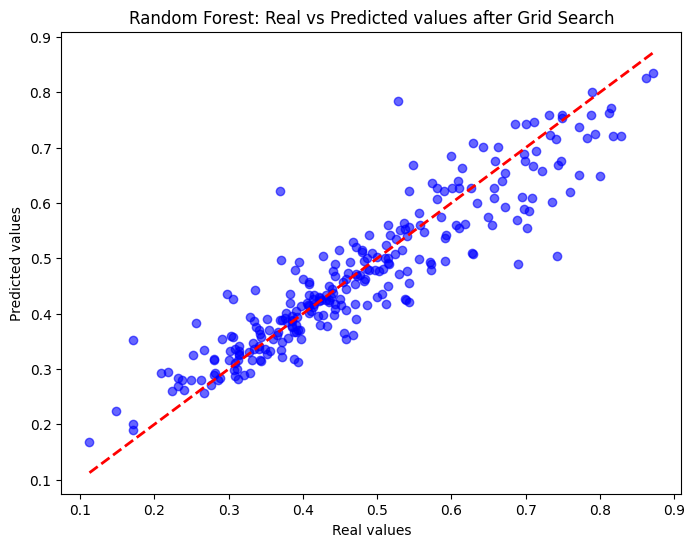

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, best_rf_predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Random Forest: Real vs Predicted values after Grid Search')